In [1]:
import pandas as pd
df=pd.read_csv('data.csv')

In [2]:
df.head()

,ACCOUNT_NUMBER,COMPANY_AREA,GEOGRAPHIC_AREA,MONTH_NAME,YEAR_NAME,MONTH_YEAR,TYPE_OF_ACTIVITY,PRODUCT_COMBO,INTERNET_SPEED,SOURCE_OF_SALE,TYPE_OF_CONNECT_INSTALL,CUSTOMER_DISCONNECT_REASON,MONTHLY_RECURRING_REVENUE,EXPENSE_SALES_AND_MARKETING,EXPENSE_CONNECT_INSTALL,EXPENSE_PRODUCT_SUPPORT,TOTAL_EXPENSE,TOTAL_MARGIN
0,75912493,MID-ATLANTIC AREA,SOUTH-WEST,FEB,2019,FEB-2019,CONNECT,INTERNET & TV,FASTER,ONLINE,CUSTOMER SELF INSTALL,NaN,$75.00,-$18.00,-$5.00,-$20.00,-$43.00,$32.00
1,75912494,MID-ATLANTIC AREA,WEST,MAR,2019,MAR-2019,DISCONNECT,INTERNET & TV & PHONE,FASTER,NaN,NaN,COMPETITION,-$75.00,$0.00,$0.00,$0.00,$0.00,-$75.00
2,75912495,MID-ATLANTIC AREA,EAST,FEB,2020,FEB-2020,CONNECT,INTERNET ONLY,FASTER,STORE/RETAIL,CUSTOMER SELF INSTALL,NaN,$75.00,-$15.00,-$5.00,-$5.00,-$25.00,$50.00
3,75912496,MID-ATLANTIC AREA,EAST,MAR,2020,MAR-2020,DISCONNECT,INTERNET & TV & PHONE,FASTEST,NaN,NaN,MOVED,-$100.00,$0.00,$0.00,$0.00,$0.00,-$100.00
4,75912497,MID-ATLANTIC AREA,NORTH,JAN,2020,JAN-2020,DISCONNECT,INTERNET ONLY,FAST,NaN,NaN,UNKNOWN,-$50.00,$0.00,$0.00,$0.00,$0.00,-$50.00


In [3]:
import numpy as np

In [ ]:
# customer coneects 

In [6]:
jan=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='JAN')&(df['TYPE_OF_ACTIVITY']=='CONNECT')]

In [11]:
jan['ACCOUNT_NUMBER'].nunique()

1861

In [12]:
feb=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='FEB')&(df['TYPE_OF_ACTIVITY']=='CONNECT')]
feb['ACCOUNT_NUMBER'].nunique()

2118

In [13]:
mar=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='MAR')&(df['TYPE_OF_ACTIVITY']=='CONNECT')]
mar['ACCOUNT_NUMBER'].nunique()

2068

In [14]:
feb20=df.loc[(df['YEAR_NAME']==2020)&(df['MONTH_NAME']=='FEB')&(df['TYPE_OF_ACTIVITY']=='CONNECT')]
feb20['ACCOUNT_NUMBER'].nunique()

1970

In [15]:
mar20=df.loc[(df['YEAR_NAME']==2020)&(df['MONTH_NAME']=='MAR')&(df['TYPE_OF_ACTIVITY']=='CONNECT')]
mar20['ACCOUNT_NUMBER'].nunique()

2174

In [ ]:
# customer disconnects 

In [16]:
jan19=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='JAN')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
jan19['ACCOUNT_NUMBER'].nunique()

1252

In [17]:
feb19=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='FEB')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
feb19['ACCOUNT_NUMBER'].nunique()

1395

In [18]:
mar19=df.loc[(df['YEAR_NAME']==2019)&(df['MONTH_NAME']=='MAR')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
mar19['ACCOUNT_NUMBER'].nunique()

1266

In [19]:
jan20=df.loc[(df['YEAR_NAME']==2020)&(df['MONTH_NAME']=='JAN')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
jan20['ACCOUNT_NUMBER'].nunique()

1287

In [20]:
feb20=df.loc[(df['YEAR_NAME']==2020)&(df['MONTH_NAME']=='FEB')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
feb20['ACCOUNT_NUMBER'].nunique()

1417

In [21]:
mar20=df.loc[(df['YEAR_NAME']==2020)&(df['MONTH_NAME']=='MAR')&(df['TYPE_OF_ACTIVITY']=='DISCONNECT')]
mar20['ACCOUNT_NUMBER'].nunique()

1306

In [212]:
new_df=pd.read_csv('connects.csv')
new_df.head()

,date,connects,disconnects
0,1/31/2019,1861,-1252
1,2/28/2019,2118,-1395
2,3/31/2019,2068,-1266
3,4/30/2019,2069,-1323
4,5/31/2019,2031,-1434


In [213]:
new_df = new_df.set_index('date')

In [214]:
new_df.head()

,connects,disconnects
date,,
1/31/2019,1861,-1252
2/28/2019,2118,-1395
3/31/2019,2068,-1266
4/30/2019,2069,-1323
5/31/2019,2031,-1434


In [182]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

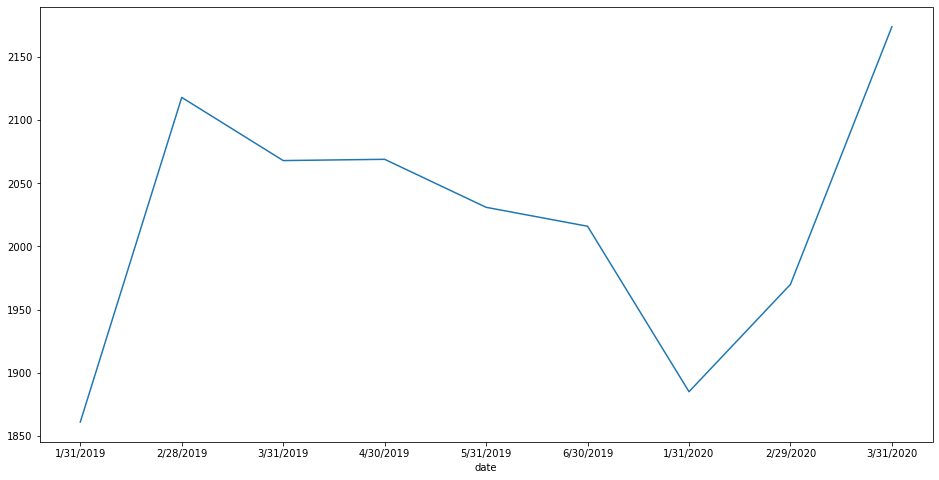

In [215]:
temp = new_df['connects']
temp.plot(figsize=(16,8))

<AxesSubplot:xlabel='date'>

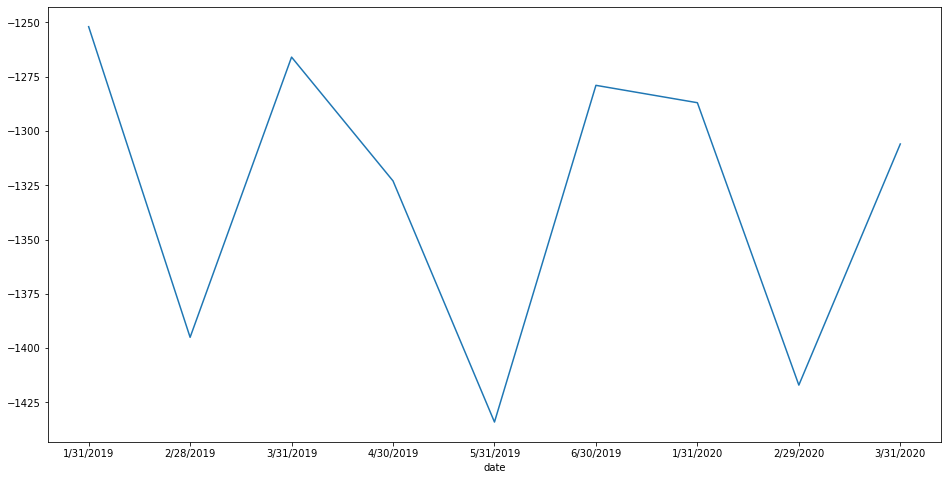

In [216]:
temp2 = new_df['disconnects']
temp2.plot(figsize=(16,8))

In [331]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [350]:
connects_df = pd.DataFrame(new_df['connects'])
connects_df 

,connects
date,
1/31/2019,1861
2/28/2019,2118
3/31/2019,2068
4/30/2019,2069
5/31/2019,2031
6/30/2019,2016
1/31/2020,1885
2/29/2020,1970
3/31/2020,2174


In [351]:
dataset = connects_df.values
dataset

array([[1861],
       [2118],
       [2068],
       [2069],
       [2031],
       [2016],
       [1885],
       [1970],
       [2174]], dtype=int64)

In [352]:
def create_dataset(dataset,look_back=1): 
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1): 
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [353]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


In [354]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)-train_size 
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [355]:


look_back = 1 
trainX, trainY = create_dataset(train, look_back)
testX,testY = create_dataset(test,look_back)

trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [356]:
# building and Training LSTM model 

model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
2/2 - 2s - loss: 0.4998 - 2s/epoch - 863ms/step
Epoch 2/100
2/2 - 0s - loss: 0.4953 - 4ms/epoch - 2ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4907 - 4ms/epoch - 2ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4861 - 6ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 0.4815 - 7ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4770 - 7ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4724 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4680 - 6ms/epoch - 3ms/step
Epoch 9/100
2/2 - 0s - loss: 0.4635 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.4591 - 5ms/epoch - 2ms/step
Epoch 11/100
2/2 - 0s - loss: 0.4546 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.4502 - 5ms/epoch - 2ms/step
Epoch 13/100
2/2 - 0s - loss: 0.4458 - 7ms/epoch - 3ms/step
Epoch 14/100
2/2 - 0s - loss: 0.4414 - 5ms/epoch - 2ms/step
Epoch 15/100
2/2 - 0s - loss: 0.4370 - 6ms/epoch - 3ms/step
Epoch 16/100
2/2 - 0s - loss: 0.4327 - 10ms/epoch - 5ms/step
Epoch 17/100
2/2 - 0s - loss: 0.4284 - 4ms/epoc

In [357]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [358]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [359]:
# calculate root mean squared error 
import math
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score:%.2f RMSE'%(trainScore))

testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Test Score:%.2f RMSE'%(testScore))

Train Score:122.17 RMSE
Test Score:65.17 RMSE


In [360]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

In [361]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] =np.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:]=testPredict 

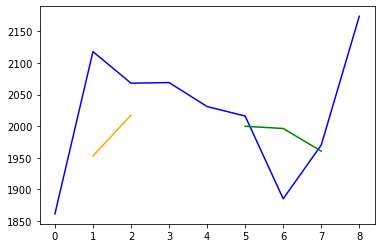

In [362]:
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='orange')
plt.plot(testPredictPlot,color='green')
plt.show()